In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
categorical_transformer = OneHotEncoder()

transformed = ColumnTransformer(
    [(
        "one_hot",
        categorical_transformer,
        categorical_features
    )],
    remainder="passthrough"
)

transformed_X = transformed.fit_transform(X)
pd.DataFrame(transformed_X)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,56.0,120.0,236.0,178.0,0.8
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,57.0,120.0,354.0,163.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,140.0,241.0,123.0,0.2
299,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,45.0,110.0,264.0,132.0,1.2
300,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,68.0,144.0,193.0,141.0,3.4
301,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,130.0,131.0,115.0,1.2


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Sample DataFrame
df = pd.DataFrame({'color': ['red', 'green', 'blue'], 'value': [1, 2, 3]})

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['color'])
    ],
    remainder='passthrough'
)

# Combine with model
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

pipe.fit(df[['color', 'value']], [10, 20, 30])


array([ 3.33333333e+00, -1.18096486e-15, -3.33333333e+00,  6.66666667e+00])

Thresholds: [ inf 0.85 0.8  0.4  0.35 0.1 ]
FPR: [0.         0.         0.         0.33333333 0.33333333 1.        ]
TPR: [0.         0.33333333 0.66666667 0.66666667 1.         1.        ]


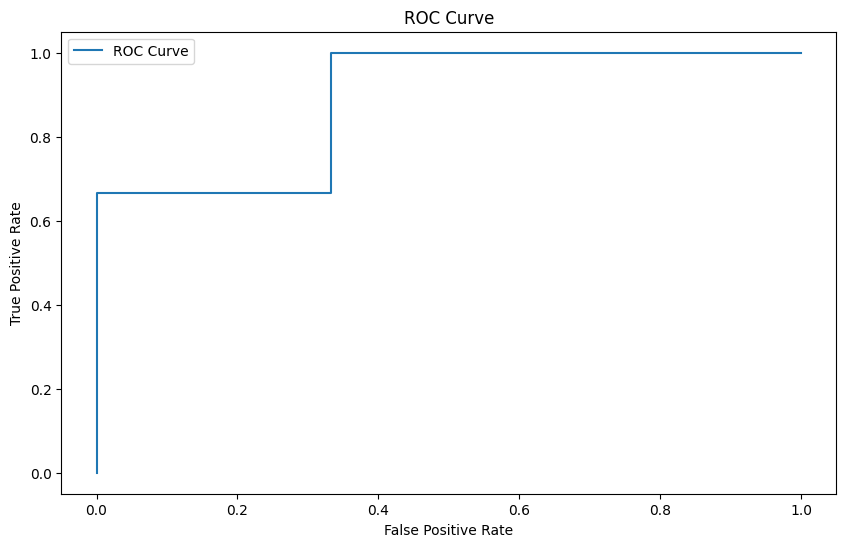

In [3]:
y_true    = [0, 0, 1, 1, 0, 1]  # actual classes
y_scores  = [0.1, 0.4, 0.35, 0.8, 0.2, 0.85]  # model scores (probabilities for class 1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print("Thresholds:", thresholds)
print("FPR:", fpr)
print("TPR:", tpr)

# plot roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [4]:
# Generate classification report
from sklearn.metrics import classification_report

y_true = [0, 1, 0, 1, 0, 1]  # actual classes
y_pred = [0.2, 0.8, 0.4, 0.6, 0.3, 0.7]  # model predictions

report = classification_report(y_true, y_pred)
print(report)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix

# Display confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the model
random_search.fit(X_train, Y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model



NameError: name 'X_train' is not defined

In [ ]:
# Save the model
import joblib

# Save the model to a file
joblib.dump(best_model, 'random_forest_model.joblib')

# Load the model from a file
